# About The Dataset
Welcome to the 2025 Kaggle Playground Series! We plan to continue in the spirit of previous playgrounds, providing interesting and approachable datasets for our community to practice their machine learning skills, and anticipate a competition each month . 

![duck](https://files.oaiusercontent.com/file-DxJQH7Kc4fbKGPtHKuJisA?se=2025-03-21T19%3A56%3A21Z&sp=r&sv=2024-08-04&sr=b&rscc=max-age%3D604800%2C%20immutable%2C%20private&rscd=attachment%3B%20filename%3Dc24f3281-40db-42a4-813c-bb83528c8108.webp&sig=Y%2BpPh55OjsD1SqwsqUQLgII463SvBwhLfw9G4xfHFUk%3D)

# Import the Libraries 📚📚

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# Lode The Dataset

In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s5e3/train.csv')

test_df = pd.read_csv('/kaggle/input/playground-series-s5e3/test.csv')

sample_df = pd.read_csv('/kaggle/input/playground-series-s5e3/sample_submission.csv')

In [3]:
train_df.head().style.background_gradient(cmap='PuBu')

In [4]:
test_df.head().style.background_gradient(cmap='PuBu')

In [5]:
sample_df.head().style.background_gradient(cmap='PuBu')

# Understand the Dataset 🔍
Check basic details.
\
Check for missing values.

In [6]:
from colorama import Fore, Style

# Print the shape of the dataframe (number of rows and columns)
print(Fore.CYAN + "train_df shape: " + Style.RESET_ALL)
print(f"{train_df.shape}\n")

# Print basic information about the dataframe (column names, data types, non-null values)
print(Fore.GREEN + "train_df info: " + Style.RESET_ALL)
print(f"{train_df.info()}\n") 

# Print the count of missing (NaN) values in each column
print(Fore.YELLOW + "train_df isnull sum: " + Style.RESET_ALL)
print(f"{train_df.isnull().sum()}\n")

# Print summary statistics for numerical columns (count, mean, std, min, max, etc.)
print(Fore.MAGENTA + "train_df describe: " + Style.RESET_ALL)
print(f"{train_df.describe()}\n")


train_df shape: 
(2190, 13)

train_df info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB
None

train_df isnull sum: 
id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp     

In [7]:
# Print the shape of the dataframe (number of rows and columns)
print(Fore.CYAN + "test_df shape: " + Style.RESET_ALL)
print(f"{test_df.shape}\n")

# Print basic information about the dataframe (column names, data types, non-null values)
print(Fore.GREEN + "test_df info: " + Style.RESET_ALL)
print(f"{test_df.info()}\n") 

# Print the count of missing (NaN) values in each column
print(Fore.YELLOW + "test_df isnull sum: " + Style.RESET_ALL)
print(f"{test_df.isnull().sum()}\n")

# Print summary statistics for numerical columns (count, mean, std, min, max, etc.)
print(Fore.MAGENTA + "test_df describe: " + Style.RESET_ALL)
print(f"{test_df.describe()}\n")

test_df shape: 
(730, 12)

test_df info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             730 non-null    int64  
 1   day            730 non-null    int64  
 2   pressure       730 non-null    float64
 3   maxtemp        730 non-null    float64
 4   temparature    730 non-null    float64
 5   mintemp        730 non-null    float64
 6   dewpoint       730 non-null    float64
 7   humidity       730 non-null    float64
 8   cloud          730 non-null    float64
 9   sunshine       730 non-null    float64
 10  winddirection  729 non-null    float64
 11  windspeed      730 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 68.6 KB
None

test_df isnull sum: 
id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud 

In [8]:
test_df.describe().style.background_gradient(cmap='PuBu')

In [9]:
# Fill the missing value
test_df["winddirection"].fillna(test_df["winddirection"].median(), inplace=True)

# Distribution of Numerical Features 📉📊

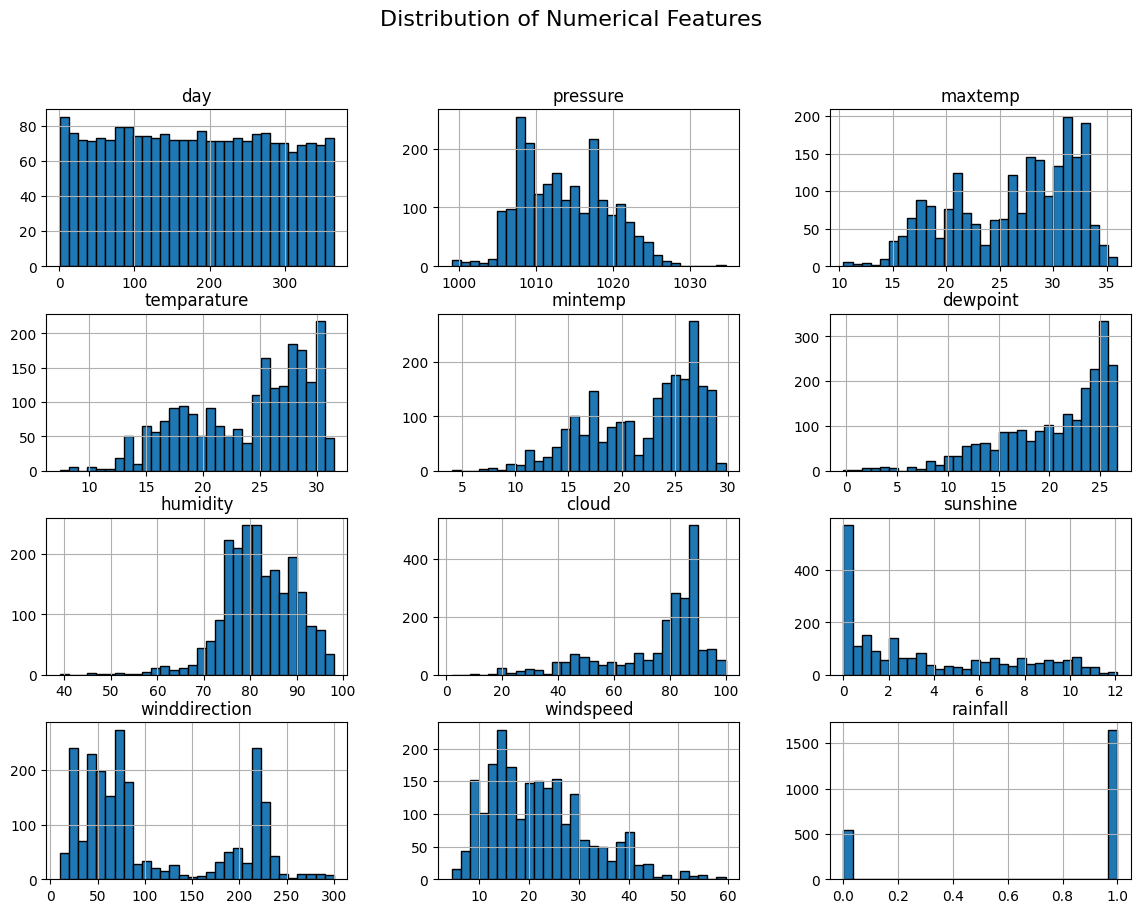

In [10]:
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns.remove('id')

train_df[numerical_columns].hist(figsize=(14, 10), bins=30, edgecolor="black", layout=(4, 3))
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

# Boxplots to check Outliers in Numerical Features 📉📊¶

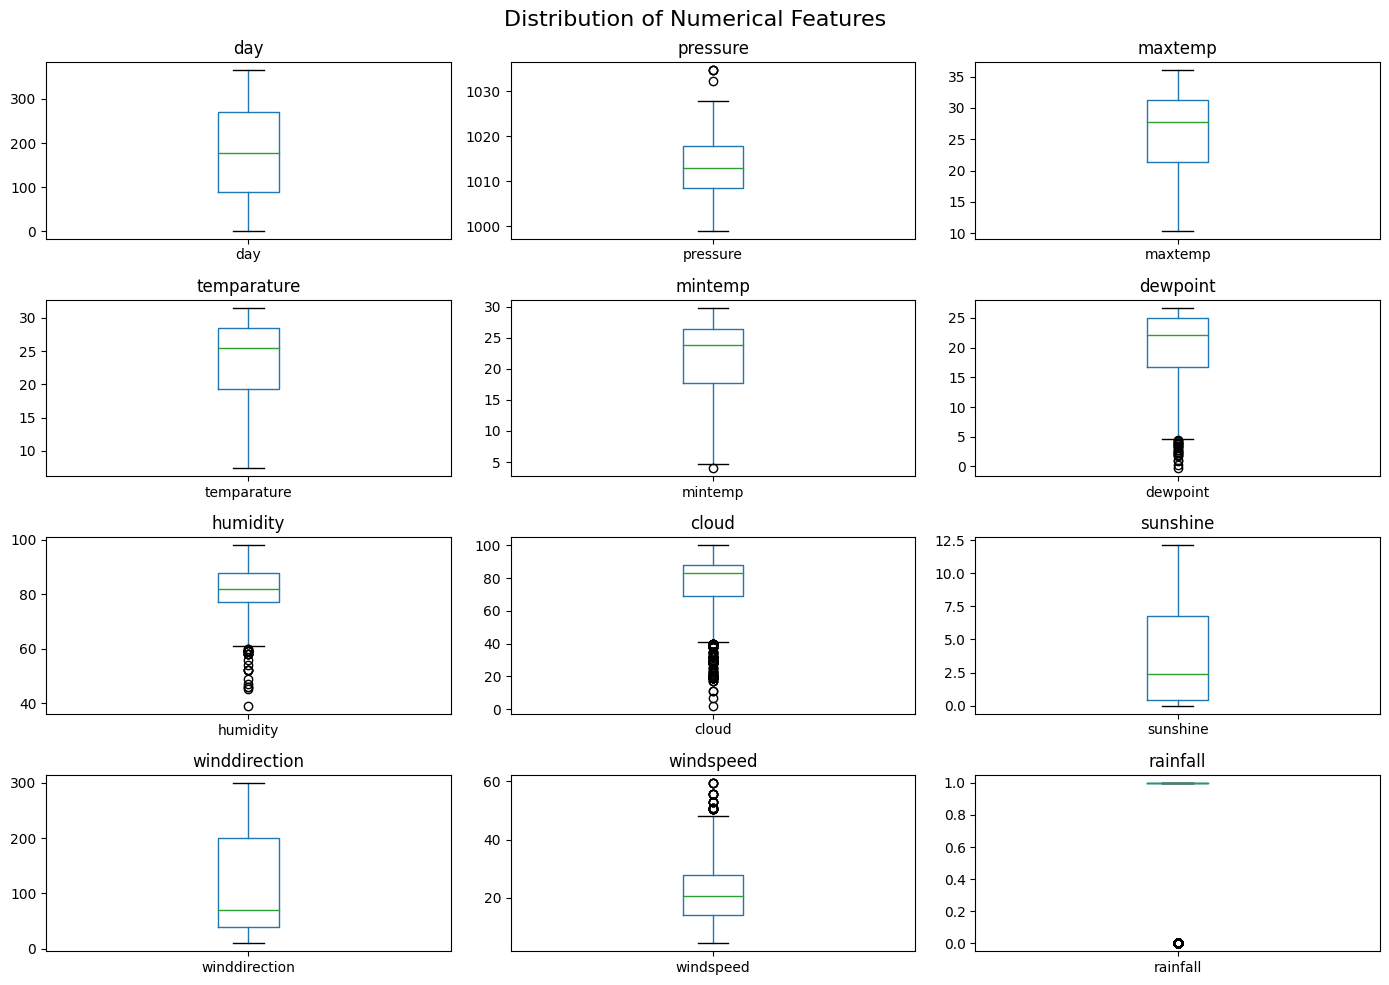

In [11]:
# Select numerical columns, excluding 'id'
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'id' in numerical_columns:
    numerical_columns.remove('id')

# Create subplots for better visualization
num_features = len(numerical_columns)
rows = (num_features // 3) + (num_features % 3 > 0)  # Adjust rows dynamically

fig, axes = plt.subplots(rows, 3, figsize=(14, 10))
axes = axes.flatten()  # Flatten to loop easily

for i, col in enumerate(numerical_columns):
    train_df.boxplot(column=[col], ax=axes[i], grid=False)
    axes[i].set_title(col)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

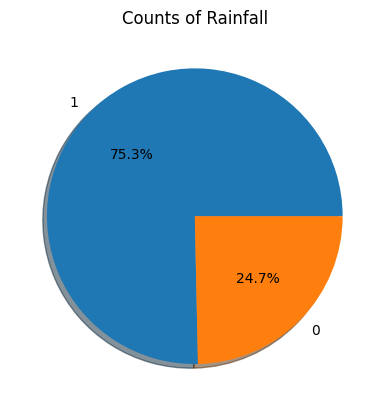

In [12]:
train_df["rainfall"].value_counts().plot(kind="pie", autopct='%1.1f%%', shadow=True)
plt.title("Counts of Rainfall")
plt.ylabel('')  # Hide y-axis label
plt.show()

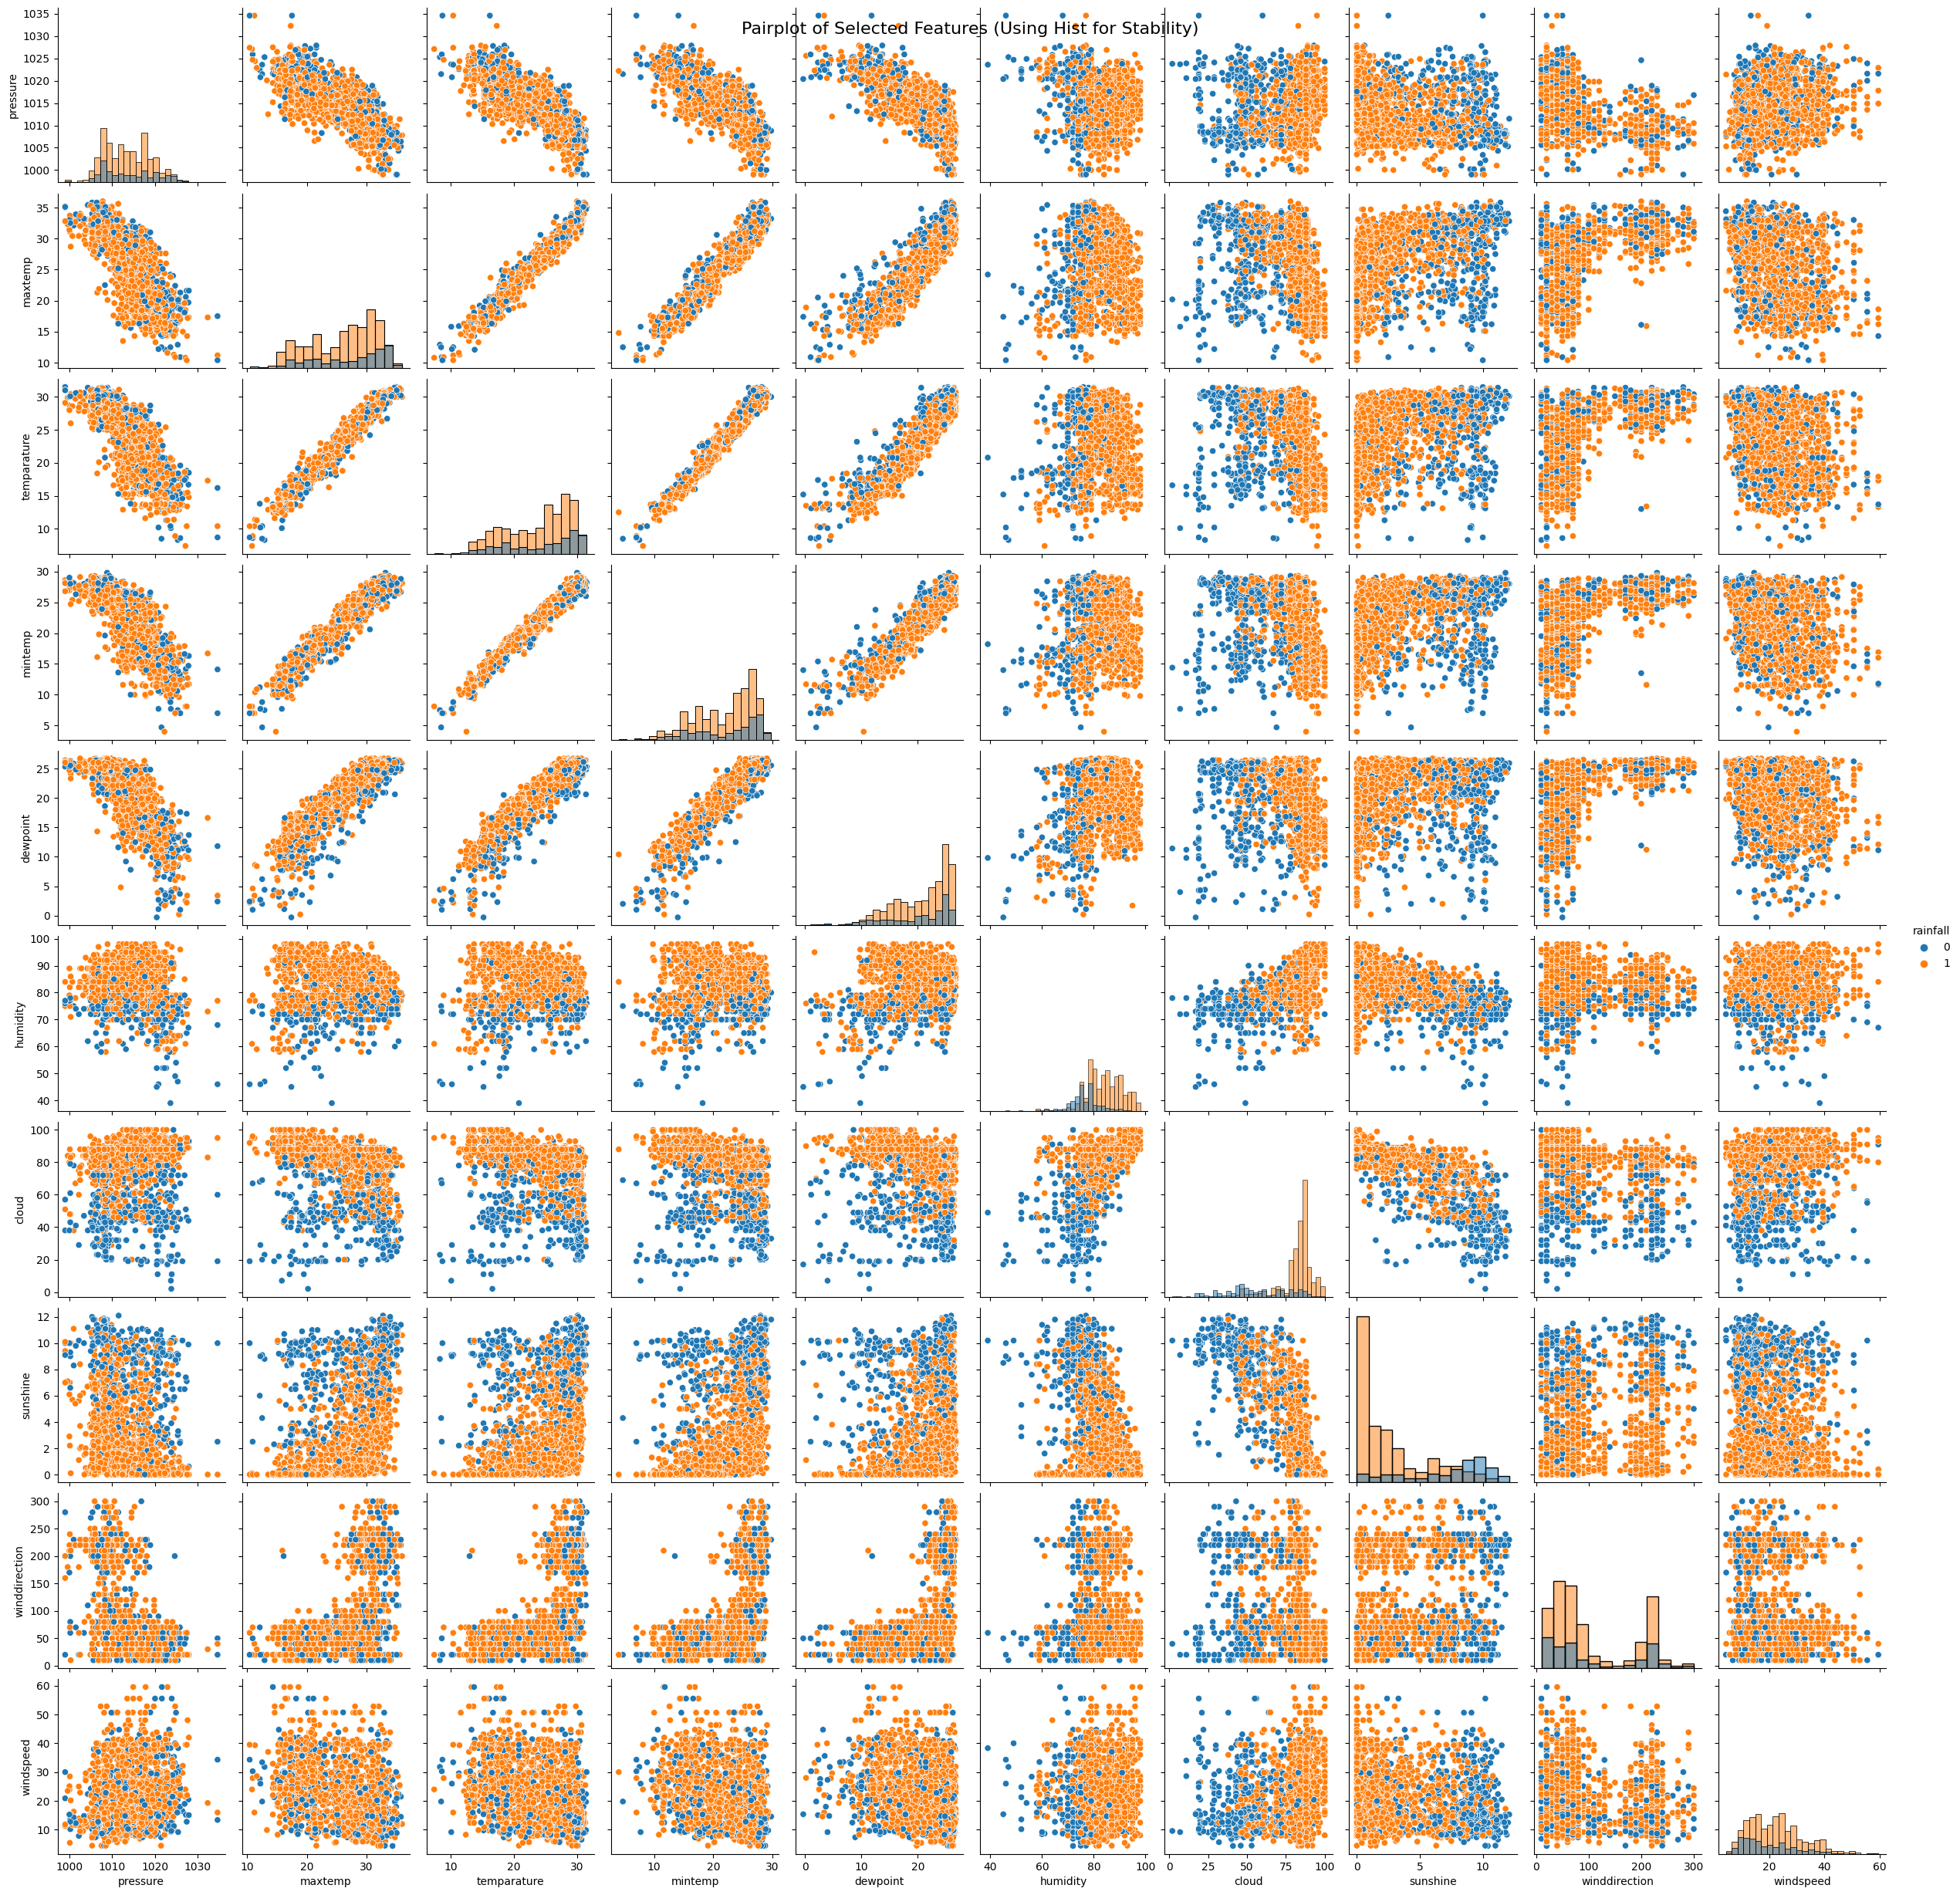

In [13]:
features = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 
            'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']

# Corrected pairplot
sns.pairplot(train_df, vars=features, hue="rainfall", diag_kind="hist")

plt.suptitle("Pairplot of Selected Features (Using Hist for Stability)", fontsize=16)
plt.show()


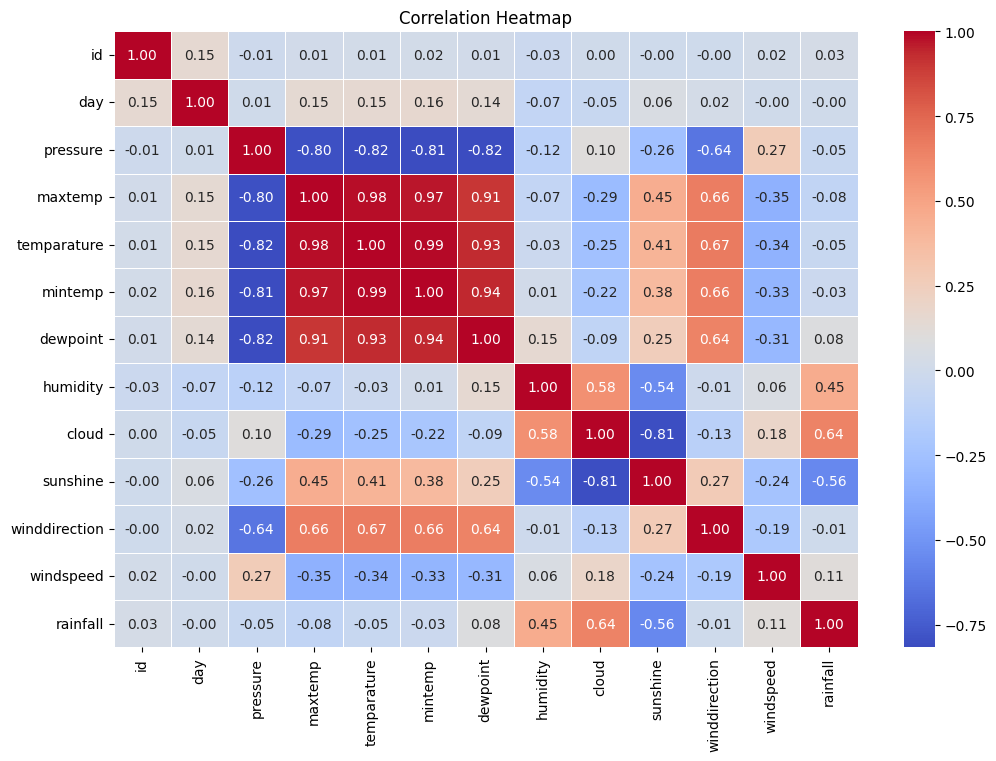

In [14]:
plt.figure(figsize= (12,8))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Feature Engineering 🔧⚙️🧰

In [15]:
train_df["Season"] = train_df["day"] % 365
def season(day):
    month = (day % 365 )// 30 + 1
    if month in [12, 1 ,2 ]:
        return 0 # winter
    elif month in [3, 4, 5]:
        return 1 # spring 
    elif month in [6, 7, 8]:
        return 2 # summer
    else:
        return 3 # autumn
train_df["Season"]= train_df["day"].apply(season)
test_df["Season"]= test_df["day"].apply(season)

In [16]:
# for the train data
train_df ["temp_range"] = train_df["maxtemp"] - train_df["mintemp"]

train_df["temp_dew_diff"] = train_df["temparature"] - train_df["dewpoint"]

train_df['humid_temp'] = train_df["humidity"] * train_df["temparature"]

train_df['cloud_sun_ratio'] = train_df["cloud"] /( train_df["sunshine"]+ 1)

# for the test data
test_df ["temp_range"] = test_df["maxtemp"] - test_df["mintemp"]

test_df["temp_dew_diff"] = test_df["temparature"] - test_df["dewpoint"]

test_df['humid_temp'] = test_df["humidity"] * test_df["temparature"]

test_df['cloud_sun_ratio'] = test_df["cloud"] /( test_df["sunshine"]+ 1)

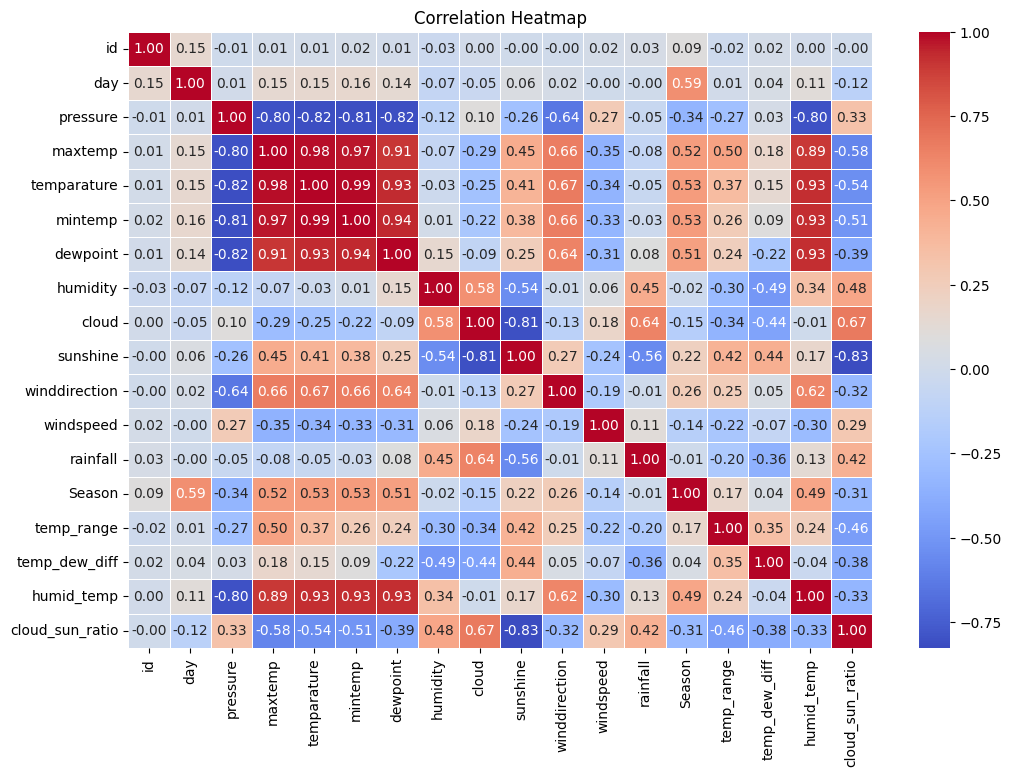

In [17]:
plt.figure(figsize= (12,8))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Split Features Target

In [18]:
x = train_df.drop(columns = ["rainfall"])
y = train_df["rainfall"]

# Standardization

In [19]:
stander = StandardScaler()
x = pd.DataFrame(stander.fit_transform (x), columns = x.columns)

# Train-Test Split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

# 🤖⚙️🧰Train The Models

### Step 1, I use these models [DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier, XGBClassifier]

In [21]:
# Running various models
models = []
models.append(("DecisionTreeClassifier",DecisionTreeClassifier()))
models.append(("RandomForestClassifier",RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_samples=1.0, max_features=1.0, max_depth=8, bootstrap=True)))
models.append(("KNeighborsClassifier",KNeighborsClassifier()))
models.append(("XGBClassifier",XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = "accuracy"

for name, model in models:
    model.fit(x_train,y_train)


    y_pred = model.predict(x_test)
    prediction = [round(value) for value in y_pred]

    
    accuracy = roc_auc_score(y_test,prediction)
    print("Accuracy: %.2f%%" % (accuracy * 100.0),name)
    print("___________________________________________")

Accuracy: 70.16% DecisionTreeClassifier
___________________________________________
Accuracy: 77.22% RandomForestClassifier
___________________________________________
Accuracy: 74.13% KNeighborsClassifier
___________________________________________
Accuracy: 77.43% XGBClassifier
___________________________________________


### Step 2, I use the [VotingClassifier]

In [22]:
# Define classifiers
d_tree = DecisionTreeClassifier(splitter='best', max_depth=9, min_samples_split=10, max_features=6, random_state=5)

r_foresr = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, 
                              max_samples=1.0, max_features='sqrt', max_depth=8, bootstrap=True)

k_neig = KNeighborsClassifier(n_neighbors=5, algorithm='auto', leaf_size=30)

estimators = [('DTREE', d_tree), ('RFOREST', r_foresr), ('k_neig', k_neig)]

voting = VotingClassifier(estimators=estimators, voting='soft')

# Fit the model
voting.fit(x_train, y_train)

# Predict probabilities for the positive class (1)
y_pred_prob = voting.predict_proba(x_test)[:, 1]

# Compute ROC AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score (Soft Voting): {auc_score:.4f}")

y_pred = voting.predict(x_test)
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_score:.4f}")

ROC AUC Score (Soft Voting): 0.8691
Accuracy Score: 0.8493


### Step 3, I use [BaggingClassifier]

In [23]:
bag_dtree = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    random_state=42
)

bag_dtree.fit(x_train,y_train)

y_pred = bag_dtree.predict(x_test)

auc_score = roc_auc_score(y_test,y_pred)
print(f"ROC AUC Score : {auc_score:.4f}")


ROC AUC Score : 0.7895


In [24]:
bag_random = BaggingClassifier(
    base_estimator=RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_samples=1.0, max_features=1.0, max_depth=8, bootstrap=True),
    n_estimators=50,
    max_samples=0.5,
    bootstrap=True,
    random_state=42
)

bag_random.fit(x_train,y_train)

y_pred = bag_random.predict(x_test)

auc_score = roc_auc_score(y_test,y_pred)
print(f"ROC AUC Score : {auc_score:.4f}")

ROC AUC Score : 0.7927


# I will contune this.